In [1]:
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def plot_2D_contour(x, y, z):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')
    return ax

In [3]:
DtestCSR = CSR2D(input_file= 'input/dipole_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  = 0.6)

formation_length 0.1
Finish step 2 in 0.4749596118927002 seconds
Finish step 3 in 0.5168938636779785 seconds
formation_length 0.23811015779522998
Finish step 4 in 0.5807554721832275 seconds
Finish step 5 in 0.6054887771606445 seconds
Finish step 6 in 0.6274447441101074 seconds
Finish step 7 in 0.9315571784973145 seconds
Finish step 8 in 0.8761024475097656 seconds
Finish step 9 in 0.9096345901489258 seconds
Finish step 10 in 1.0421264171600342 seconds
Finish step 11 in 1.1806066036224365 seconds
Finish step 12 in 1.2505323886871338 seconds
Finish step 13 in 1.4026248455047607 seconds
Finish step 14 in 1.4205224514007568 seconds


In [4]:
DtestCSR.beam.sigma_x

4.783345363120476e-05

In [30]:
t = DtestCSR.beam.position
print(t)
s  = t -2*DtestCSR.beam.sigma_z
x = (s-t)*DtestCSR.beam.slope[0] + 3*DtestCSR.beam.sigma_x


0.65


In [31]:
DtestCSR.formation_length

0.23811015779522998

In [32]:
xp, sp, CSR_integrand_z1, CSR_integrand_x1,CSR_integrand_z2, CSR_integrand_x2  = DtestCSR.get_CSR_wake(s, x, debug = True)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

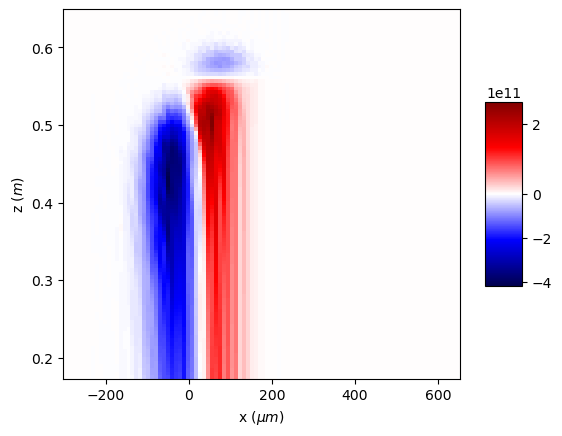

In [33]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z1.T)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

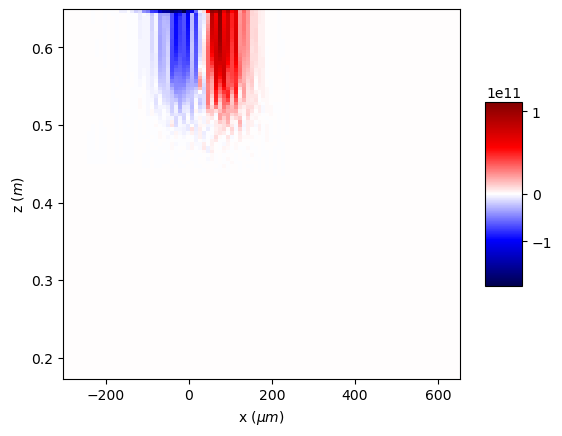

In [34]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z2.T)

## plot near singularity

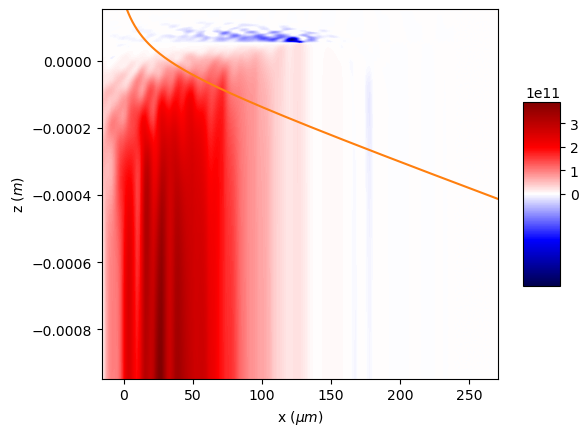

In [27]:
sp = np.linspace(s- 0.001, s + 0.0001, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -3*sigx
xR = x + 3*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')




xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## plot who range

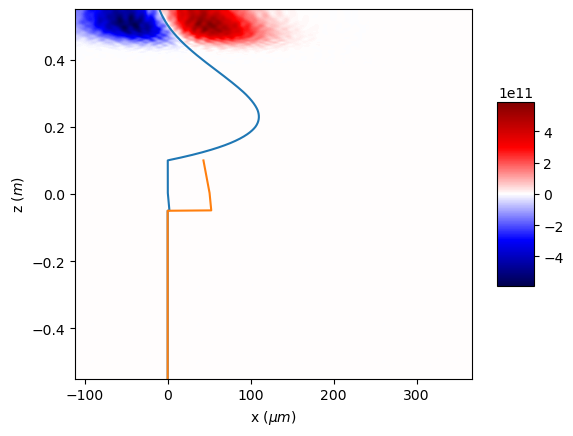

In [28]:
sp = np.linspace(s-1.2, s -0.1, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -5*sigx
xR = x + 5*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 ))
ax.plot(xp2*1e6, (sp2 ))

## Plot area 1

In [29]:
DtestCSR.formation_length

0.23811015779522998

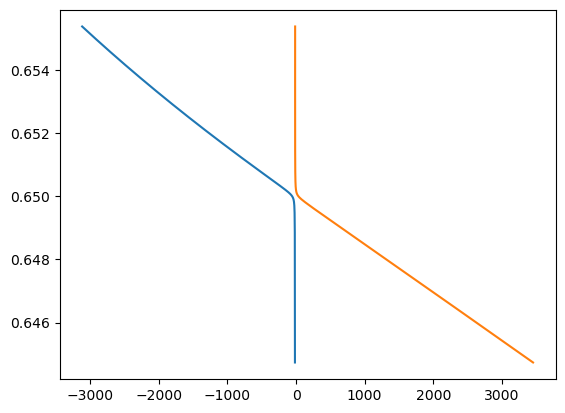

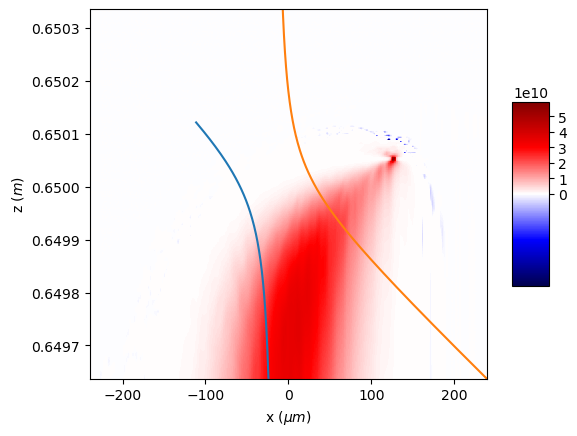

In [30]:


tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = np.abs(10*DtestCSR.beam.sigma_x/tan_theta)

sp = np.linspace(np.max((s - 100*DtestCSR.beam.sigma_z, 0)), s + 100*DtestCSR.beam.sigma_z , 100000)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)
ind  = (np.abs(xp1) < 5*DtestCSR.beam.sigma_x) &(np.abs(xp2) < 5*DtestCSR.beam.sigma_x)
plt.figure()
plt.plot(xp1*1e6, sp)
plt.plot(xp2*1e6, sp)

if sum(ind) == len(xp1):   # The two region are parallel and not tilted
    xmin = x - 5*DtestCSR.beam.sigma_x
    xmax = x + 5*DtestCSR.beam.sigma_x
    smin = s - 5*DtestCSR.beam.sigma_z
    smax = s + 5*DtestCSR.beam.sigma_z

else:
    xp1_valid = xp1[ind]
    xp2_valid = xp2[ind]
    sp_valid = sp[ind]
    smin = np.min(sp_valid)
    smax = np.max(sp_valid)
    xmin = np.min((np.min(xp1_valid), np.min(xp2_valid)))
    xmax = np.max((np.max(xp1_valid), np.max(xp2_valid)))


sp = np.linspace(smin, smax, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_x.T)
ax.plot(xp1*1e6, sp1 )
ax.plot(xp2*1e6, sp2 )

## Plot area 2

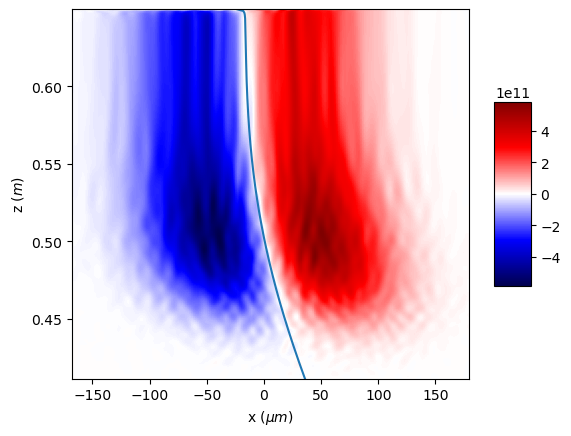

In [31]:

sp = np.linspace(np.max((smin - DtestCSR.formation_length, 0)), smin, 200)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

xL = np.min(xp1) - 3*DtestCSR.beam.sigma_x
xR = np.max(xp1) + 3*DtestCSR.beam.sigma_x




xp = np.linspace(xL  , xR, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')



sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = sp, z = CSR_integrand_z.T)
ax.plot(xp1*1e6, sp1 )

## Plot area 1 method 2

In [36]:
tan_theta

0.6631901536115957

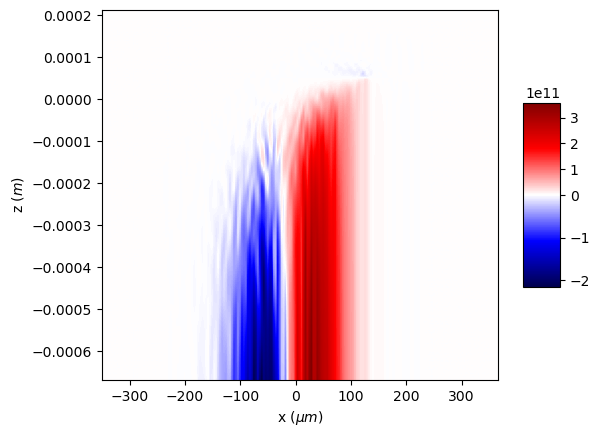

In [38]:
tan_a = DtestCSR.beam._slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz =10*DtestCSR.beam.sigma_x/np.abs(tan_theta)
x1 = x - dz*tan_theta
if tan_theta > 0:
    x2 = x + 5*DtestCSR.beam.sigma_x
    xmin, xmax = x1, x2
else:
    x2 = x - 5*DtestCSR.beam.sigma_x
    xmin, xmax = x2, x1

s1 = np.max((0,s - dz))

s2 = s + 3*DtestCSR.beam.sigma_z




    



sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))

In [39]:
s3

0.4117265984578788

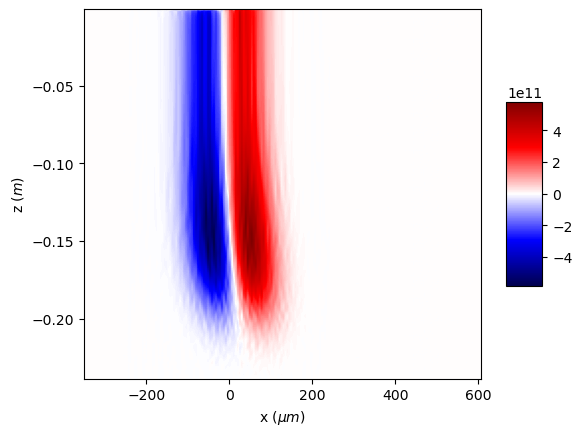

In [40]:
s3 = np.max((0, s1 - DtestCSR.formation_length))
xmin = x - 10*DtestCSR.beam._sigma_x
xmax = x + 10*DtestCSR.beam._sigma_x
sp = np.linspace(s3, s1, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))